In [1]:
from sklearn.cluster import KMeans
import numpy as np
import plotly.express as px
import pandas as pd
from tqdm import tqdm
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
%cd 'drive/MyDrive/Github/master_thesis'

[Errno 2] No such file or directory: 'drive/MyDrive/Github/master_thesis'
/home/anuar/PycharmProjects/master-thesis/clustering


In [2]:
%cd ..

/home/anuar/PycharmProjects/master-thesis


# Import Data

In [3]:
df = pd.read_csv('data/220216_preprocessed_data_missing_data.csv')
df.head()

gender  postnr   region  Q1_2_covid_is_threat  Q2_1_easy_to_follow_advice  \
0    Man    2830  Capital              4.796778                         5.0   
1  Woman    4654  Zealand              7.000000                         7.0   
2  Woman    7451  Central              7.000000                         7.0   
3    Man    4700  Zealand              6.000000                         1.0   
4    Man    4000  Zealand              5.000000                         1.0   

   Q2_2_can_follow_advice_if_wanted  Q2_3_if_follow_advice_safe  \
0                               7.0                         4.0   
1                               7.0                         5.0   
2                               7.0                         7.0   
3                               7.0                         2.0   
4                               1.0                         2.0   

   Q2_4_if_follow_advice_others_safe  \
0                                7.0   
1                                7.0   
2                                7.0   
3                                1.0   
4                                1.0   

   Q2_5_follow_advice_relationships_impared  Q2_6_follow_advice_life_degraded  \
0                                       4.0                               5.0   
1                                       6.0                               5.0   
2                                       4.0                               3.0   
3                                       7.0                               4.0   
4                                       2.0                               2.0   

   ...  Q14_ocupation_employee_private  Q14_ocupation_unemployed  \
0  ...                               0                         0   
1  ...                               0                         0   
2  ...                               0                         0   
3  ...                               0                         0   
4  ...                               0                         0   

   Q14_ocupation_employee_public  Q14_ocupation_self_employed  \
0                              1                            0   
1                              1                            0   
2                              1                            0   
3                              0                            0   
4                              0                            0   

   Q14_ocupation_student  Q14_ocupation_other  Q15_economic_spectrum  \
0                      0                    0                    2.0   
1                      0                    0                    2.0   
2                      0                    0                    NaN   
3                      0                    0                    NaN   
4                      0                    1                    2.0   

   Q15_social_spectrum  Q16_economic_spectrum  Q16_social_spectrum  
0                  4.0                    4.0                  2.0  
1                  4.0                    2.0                  4.0  
2                  NaN                    NaN                  NaN  
3                  NaN                    NaN                  NaN  
4                  4.0                    NaN                  NaN  

[5 rows x 56 columns]

In [4]:
df.columns.tolist()

['gender',
 'postnr',
 'region',
 'Q1_2_covid_is_threat',
 'Q2_1_easy_to_follow_advice',
 'Q2_2_can_follow_advice_if_wanted',
 'Q2_3_if_follow_advice_safe',
 'Q2_4_if_follow_advice_others_safe',
 'Q2_5_follow_advice_relationships_impared',
 'Q2_6_follow_advice_life_degraded',
 'Q3_1_aware_hand_hygiene',
 'Q3_2_avoid_contact',
 'Q3_3_ensure_frequent_cleaning',
 'Q3_4_avoid_risk_groups',
 'Q3_5_keep_distance',
 'Q3_6_avoid_crowds',
 'Q3_7_minimize_activities_w_contact',
 'Q5_4_yourself_kept_distance',
 'Q5_5_feel_urge_scold',
 'Q6_2_advices_important',
 'Q6_3_others_can_avoid_spreading',
 'Q6_5_ownership_of_advice',
 'Q6_6_clear_information_on_advice_reason',
 'Q6_7_advice_limits_daily_activities',
 'Q6_9_trust_political_strategy',
 'Ny1_nr_times_wearing_masks_last_week',
 'Q7_1_last_week_fever',
 'Q7_2_last_week_cough',
 'Q7_3_last_week_sore_throat',
 'Q7_4_last_week_no_smell_taste',
 'Q7_5_last_week_shortness_breath',
 'Q2020NovNy1',
 'Q2020NovNy2_tested_positive',
 'Q2020NovNy3',
 'Q2

## Extract non behavioural columns

In [5]:
 # 'Timings_yyyymmdd','timestamp',
non_behaviour_cols = ['gender','postnr', 'region',  'season','Q10_education', 'Q11_nr_members_household',
 'Q12_nr_children_household','age_num', 'Q14_ocupation_pensioner',
 'Q14_ocupation_employee_private',
 'Q14_ocupation_unemployed',
 'Q14_ocupation_employee_public',
 'Q14_ocupation_self_employed',
 'Q14_ocupation_student',
 'Q14_ocupation_other',
 'Q15_economic_spectrum',
 'Q15_social_spectrum',
 'Q16_economic_spectrum',
 'Q16_social_spectrum',

 'Q7_1_last_week_fever',
 'Q7_2_last_week_cough',
 'Q7_3_last_week_sore_throat',
 'Q7_4_last_week_no_smell_taste',
 'Q7_5_last_week_shortness_breath',
 'Q2020NovNy1',
 'Q2020NovNy2_tested_positive',
 'Q2020NovNy3',
 'Q2020NovNy4', 'date']

In [8]:
behaviour_cols = df.columns.tolist()
for element in non_behaviour_cols:
    if element in behaviour_cols:
        behaviour_cols.remove(element)

## Scale Answers

In [9]:
answers_raw = df[behaviour_cols].to_numpy()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(answers_raw)
answers = scaler.transform(answers_raw)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(answers_raw)
answers = scaler.transform(answers_raw)

# K-means clustering

## Elbow approach to determine ideal amount of clusters

In [12]:
distortions = []
distortions_k = []
K = range(1,6)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(answers)
    distortions.append(kmeanModel.inertia_)
    distortions_k.append(kmeanModel.inertia_/k)


100%|██████████| 5/5 [00:12<00:00,  2.53s/it]


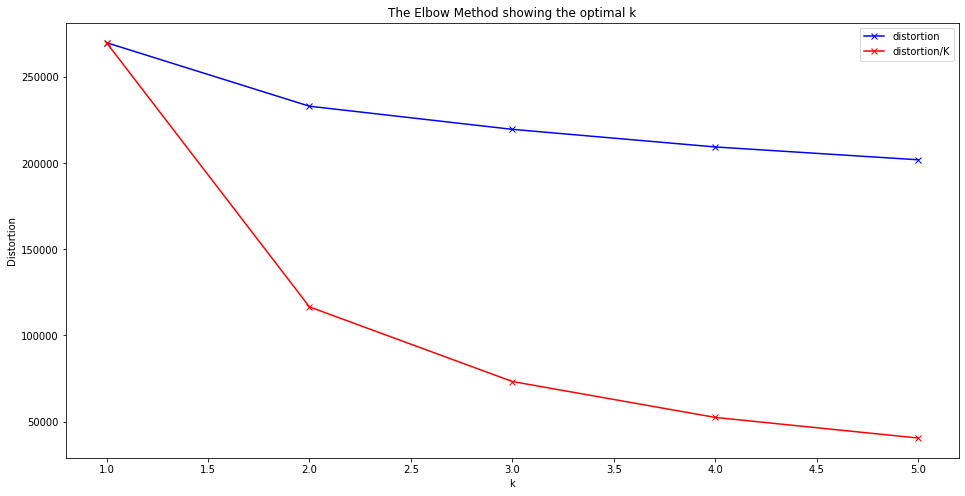

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', label='distortion')
plt.plot(K, distortions_k, 'rx-', label='distortion/K')
plt.legend()
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## K-means fit

In [14]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(answers)

In [15]:
df['group']=kmeans.labels_

In [16]:
df.head()

gender  postnr   region  Q1_2_covid_is_threat  Q2_1_easy_to_follow_advice  \
0    Man    2830  Capital              4.796778                         5.0   
1  Woman    4654  Zealand              7.000000                         7.0   
2  Woman    7451  Central              7.000000                         7.0   
3    Man    4700  Zealand              6.000000                         1.0   
4    Man    4000  Zealand              5.000000                         1.0   

   Q2_2_can_follow_advice_if_wanted  Q2_3_if_follow_advice_safe  \
0                               7.0                         4.0   
1                               7.0                         5.0   
2                               7.0                         7.0   
3                               7.0                         2.0   
4                               1.0                         2.0   

   Q2_4_if_follow_advice_others_safe  \
0                                7.0   
1                                7.0   
2                                7.0   
3                                1.0   
4                                1.0   

   Q2_5_follow_advice_relationships_impared  Q2_6_follow_advice_life_degraded  \
0                                       4.0                               5.0   
1                                       6.0                               5.0   
2                                       4.0                               3.0   
3                                       7.0                               4.0   
4                                       2.0                               2.0   

   ...  Q14_ocupation_unemployed  Q14_ocupation_employee_public  \
0  ...                         0                              1   
1  ...                         0                              1   
2  ...                         0                              1   
3  ...                         0                              0   
4  ...                         0                              0   

   Q14_ocupation_self_employed  Q14_ocupation_student  Q14_ocupation_other  \
0                            0                      0                    0   
1                            0                      0                    0   
2                            0                      0                    0   
3                            0                      0                    0   
4                            0                      0                    1   

   Q15_economic_spectrum  Q15_social_spectrum  Q16_economic_spectrum  \
0                    2.0                  4.0                    4.0   
1                    2.0                  4.0                    2.0   
2                    NaN                  NaN                    NaN   
3                    NaN                  NaN                    NaN   
4                    2.0                  4.0                    NaN   

   Q16_social_spectrum  group  
0                  2.0      0  
1                  4.0      0  
2                  NaN      0  
3                  NaN      0  
4                  NaN      1  

[5 rows x 57 columns]

# Analysis

## Initial answers distribution

In [22]:
df[df.date<"2021-01-03"].round()

gender  postnr    region  Q1_2_covid_is_threat  \
1       Woman    4654   Zealand                   7.0   
3         Man    4700   Zealand                   6.0   
4         Man    4000   Zealand                   5.0   
5         Man    8543   Central                   4.0   
6       Woman    3760   Capital                   1.0   
...       ...     ...       ...                   ...   
122815    Man    8370   Central                   5.0   
122817    Man    2450   Capital                   7.0   
122824  Woman    8220   Central                   6.0   
122826  Woman    2400   Capital                   4.0   
122828    Man    6650  Southern                   6.0   

        Q2_1_easy_to_follow_advice  Q2_2_can_follow_advice_if_wanted  \
1                              7.0                               7.0   
3                              1.0                               7.0   
4                              1.0                               1.0   
5                              7.0                               7.0   
6                              6.0                               7.0   
...                            ...                               ...   
122815                         7.0                               7.0   
122817                         6.0                               7.0   
122824                         4.0                               2.0   
122826                         5.0                               6.0   
122828                         5.0                               6.0   

        Q2_3_if_follow_advice_safe  Q2_4_if_follow_advice_others_safe  \
1                              5.0                                7.0   
3                              2.0                                1.0   
4                              2.0                                1.0   
5                              7.0                                1.0   
6                              7.0                                7.0   
...                            ...                                ...   
122815                         5.0                                7.0   
122817                         6.0                                7.0   
122824                         4.0                                1.0   
122826                         5.0                                5.0   
122828                         2.0                                6.0   

        Q2_5_follow_advice_relationships_impared  \
1                                            6.0   
3                                            7.0   
4                                            2.0   
5                                            1.0   
6                                            4.0   
...                                          ...   
122815                                       4.0   
122817                                       7.0   
122824                                       4.0   
122826                                       5.0   
122828                                       5.0   

        Q2_6_follow_advice_life_degraded  ...  Q14_ocupation_unemployed  \
1                                    5.0  ...                         0   
3                                    4.0  ...                         0   
4                                    2.0  ...                         0   
5                                    7.0  ...                         0   
6                                    1.0  ...                         0   
...                                  ...  ...                       ...   
122815                               1.0  ...                         0   
122817                               6.0  ...                         0   
122824                               4.0  ...                         0   
122826                               2.0  ...                         0   
122828                               4.0  ...                         0   

        Q14_ocupation_employee_public  Q14_ocupation_s

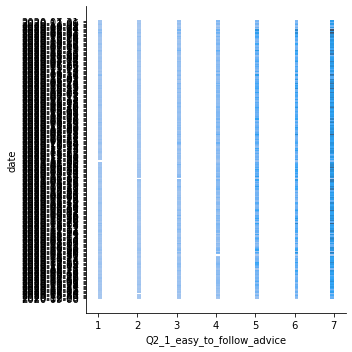

In [23]:
sns.displot(data=df[df.date<"2021-01-03"].round(), x='Q2_1_easy_to_follow_advice', y="date")
plt.show()

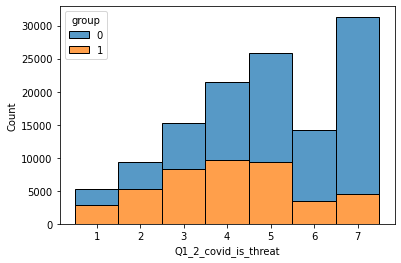

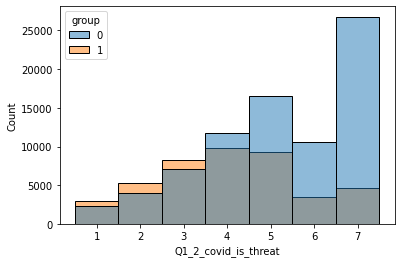

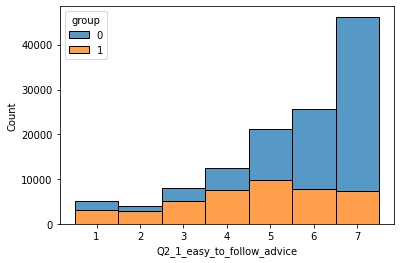

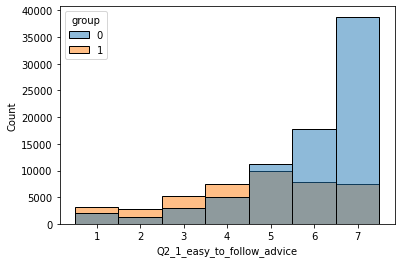

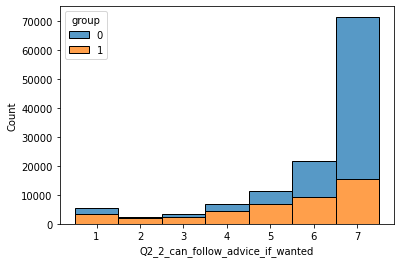

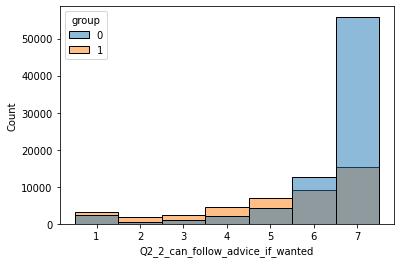

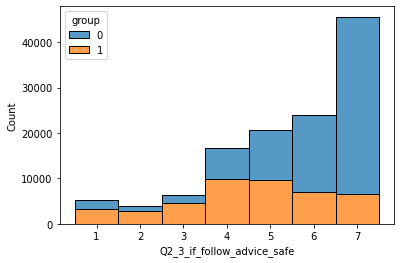

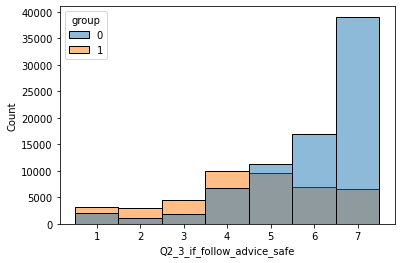

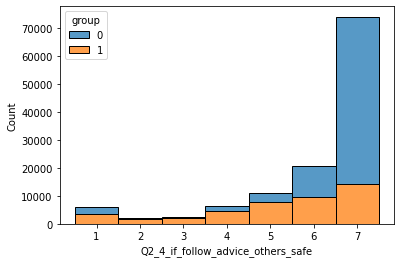

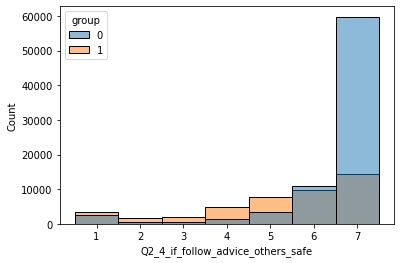

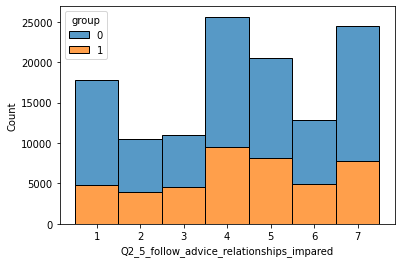

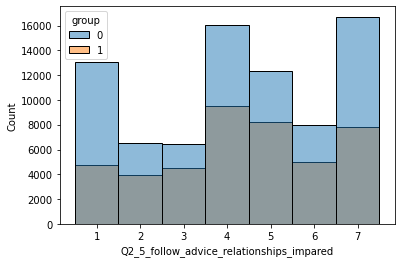

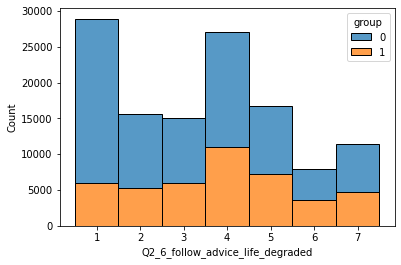

KeyboardInterrupt: 

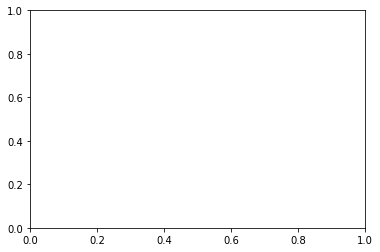

In [17]:
behaviour_cols
import matplotlib.pyplot as plt

for col in behaviour_cols:
    sns.histplot(data=df.round(), x=col, hue="group", discrete=True, multiple="stack")
    plt.show()
    sns.histplot(data=df.round(), x=col, hue="group", discrete=True)
    plt.show()

## Groups Description

In [77]:
groups_def = pd.DataFrame(data=scaler.inverse_transform(kmeans.cluster_centers_), columns=behaviour_cols)
groups_def

Q1_2_covid_is_threat  Q2_1_easy_to_follow_advice  \
0              5.208174                    5.919618   
1              4.051690                    4.633207   

   Q2_2_can_follow_advice_if_wanted  Q2_3_if_follow_advice_safe  \
0                          6.379381                    5.924166   
1                          5.273687                    4.534368   

   Q2_4_if_follow_advice_others_safe  \
0                           6.473796   
1                           5.240142   

   Q2_5_follow_advice_relationships_impared  Q2_6_follow_advice_life_degraded  \
0                                  4.253926                          3.247492   
1                                  4.345101                          3.866647   

   Q3_1_aware_hand_hygiene  Q3_2_avoid_contact  Q3_3_ensure_frequent_cleaning  \
0                 6.663314            6.239682                       5.700782   
1                 5.649539            4.214326                       4.160153   

   ...  Q6_3_others_can_avoid_spreading  Q6_5_ownership_of_advice  \
0  ...                         4.712536                  6.206649   
1  ...                         4.178768                  4.550287   

   Q6_6_clear_information_on_advice_reason  \
0                                 5.900820   
1                                 4.136967   

   Q6_7_advice_limits_daily_activities  Q6_9_trust_political_strategy  \
0                             4.303009                       5.681270   
1                             4.071544                       3.852146   

   Ny1_nr_times_wearing_masks_last_week  Q4_1_nr_contact_nonhouse_family  \
0                              2.051352                         1.399090   
1                              1.709675                         1.897675   

   Q4_2_nr_contact_colleagues  Q4_3_nr_contact_friends  \
0                    1.227952                 1.367435   
1                    2.423079                 2.686341   

   Q4_4_nr_contact_strangers  
0                   2.127314  
1                   4.062617  

[2 rows x 27 columns]

## Group Distance

In [78]:
df_dict = []
for i, day in  df[behaviour_cols + ['date', 'group']].groupby(['date']):
     groups_dist = np.abs(day[day['group']== 0].mean() - day[day['group']== 1].mean())
     dist = np.linalg.norm(groups_dist.values, ord=1)
     df_dict.append({'time':i, 'distance': dist})
dist_df = pd.DataFrame(df_dict)

/tmp/ipykernel_24274/4239959398.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [79]:
dist_df['dist_smooth'] = dist_df.distance.rolling(7).mean()

In [80]:
fig = px.line(dist_df,x='time', y=['distance', 'dist_smooth'])
fig.show()

## Groups daily distribution

In [81]:
groups_percentage = df.groupby(['date','group'],as_index=False)['gender'].count()
groups_percentage

date  group  gender
0     2020-05-29      0      38
1     2020-05-29      1      16
2     2020-05-30      0     217
3     2020-05-30      1      80
4     2020-05-31      0     122
...          ...    ...     ...
1099  2021-11-29      1      49
1100  2021-11-30      0      86
1101  2021-11-30      1      51
1102  2021-12-01      0      87
1103  2021-12-01      1      60

[1104 rows x 3 columns]

In [82]:
def normalize(row):
  sum = groups_percentage[groups_percentage['date']==row['date']]['gender'].sum()
  return row['gender']/sum

groups_percentage['percentage'] = groups_percentage.apply(lambda x: normalize(x), axis=1)
groups_percentage.drop(columns='gender',inplace=True)
groups_percentage

date  group  percentage
0     2020-05-29      0    0.703704
1     2020-05-29      1    0.296296
2     2020-05-30      0    0.730640
3     2020-05-30      1    0.269360
4     2020-05-31      0    0.616162
...          ...    ...         ...
1099  2021-11-29      1    0.411765
1100  2021-11-30      0    0.627737
1101  2021-11-30      1    0.372263
1102  2021-12-01      0    0.591837
1103  2021-12-01      1    0.408163

[1104 rows x 3 columns]

In [ ]:
# for pandas version "1.4.0, we pray for the day colab updates"
'''groups_per_day = df[['date','group']].groupby(['date']).value_counts(normalize=True)
groups_percentage = groups_per_day.index.to_frame(index=False)
groups_percentage['percentage'] = groups_per_day.values
groups_percentage'''

In [83]:
observations = pd.read_csv('data/observations_30012022.csv',sep=';', decimal=',', encoding='utf-8')

In [84]:
sliced_observations = observations.iloc[92:643]
fig = px.line(sliced_observations, x="Date", y=sliced_observations.columns[2:])
fig.show()

In [85]:
fig = px.line(groups_percentage, x="date", y="percentage", color='group', title='Group daily distribution')
fig.show()

## Percentage and distance comparison

In [86]:
dist_df['percentage'] = groups_percentage[groups_percentage['group'] == 1].percentage.reset_index(drop=True)

In [87]:
dist_df['percentage_smooth'] = dist_df['percentage'].rolling(7).mean()

In [89]:
# import graph_objects from plotly package
import plotly.graph_objects as go

# import make_subplots function from plotly.subplots
# to make grid of plots
from plotly.subplots import make_subplots

# use specs parameter in make_subplots function
# to create secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# plot a scatter chart by specifying the x and y values
# Use add_trace function to specify secondary_y axes.
fig.add_trace(
	go.Scatter(x=dist_df.time, y=dist_df.dist_smooth, name="Distance"),
	secondary_y=False)

# Use add_trace function and specify secondary_y axes = True.
fig.add_trace(
	go.Scatter(x=dist_df.time, y=dist_df.percentage_smooth, name="Percentage"),
	secondary_y=True,)

# Adding title text to the figure
fig.update_layout(
	title_text="Cluster percentage compared to cluster distance"
)

# Naming x-axis
fig.update_xaxes(title_text="Day")

# Naming y-axes
fig.update_yaxes(title_text="Euclidean distance", secondary_y=False)
fig.update_yaxes(title_text="%", secondary_y=True)


## Group non-behavioural Analysis

In [90]:
group_analysis = df[non_behaviour_cols+['group','date']].copy()
group_analysis.head()

gender  postnr   region  season  Q10_education  Q11_nr_members_household  \
0    Man    2830  Capital     4.0              8                         1   
1  Woman    4654  Zealand     2.0              3                         1   
2  Woman    7451  Central     2.0              4                         1   
3    Man    4700  Zealand     3.0              3                         1   
4    Man    4000  Zealand     4.0              4                         2   

   Q12_nr_children_household  age_num  Q14_ocupation_pensioner  \
0                          0        6                        0   
1                          0        5                        0   
2                          0        5                        0   
3                          0        5                        1   
4                          1        4                        0   

   Q14_ocupation_employee_private  ...  Q7_3_last_week_sore_throat  \
0                               0  ...                         0.0   
1                               0  ...                         0.0   
2                               0  ...                         0.0   
3                               0  ...                         0.0   
4                               0  ...                         0.0   

   Q7_4_last_week_no_smell_taste  Q7_5_last_week_shortness_breath  \
0                            0.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   Q2020NovNy1  Q2020NovNy2_tested_positive  Q2020NovNy3  Q2020NovNy4  \
0          NaN                          NaN          0.0          NaN   
1          NaN                          NaN          NaN          NaN   
2          0.0                          0.0          0.0          NaN   
3          NaN                          NaN          0.0          NaN   
4          0.0                          0.0          0.0          NaN   

         date  group        date  
0  2021-01-03      0  2021-01-03  
1  2020-07-31      0  2020-07-31  
2  2021-06-05      0  2021-06-05  
3  2020-11-06      0  2020-11-06  
4  2020-12-09      1  2020-12-09  

[5 rows x 31 columns]

In [91]:
groups_def

Q1_2_covid_is_threat  Q2_1_easy_to_follow_advice  \
0              5.208174                    5.919618   
1              4.051690                    4.633207   

   Q2_2_can_follow_advice_if_wanted  Q2_3_if_follow_advice_safe  \
0                          6.379381                    5.924166   
1                          5.273687                    4.534368   

   Q2_4_if_follow_advice_others_safe  \
0                           6.473796   
1                           5.240142   

   Q2_5_follow_advice_relationships_impared  Q2_6_follow_advice_life_degraded  \
0                                  4.253926                          3.247492   
1                                  4.345101                          3.866647   

   Q3_1_aware_hand_hygiene  Q3_2_avoid_contact  Q3_3_ensure_frequent_cleaning  \
0                 6.663314            6.239682                       5.700782   
1                 5.649539            4.214326                       4.160153   

   ...  Q6_3_others_can_avoid_spreading  Q6_5_ownership_of_advice  \
0  ...                         4.712536                  6.206649   
1  ...                         4.178768                  4.550287   

   Q6_6_clear_information_on_advice_reason  \
0                                 5.900820   
1                                 4.136967   

   Q6_7_advice_limits_daily_activities  Q6_9_trust_political_strategy  \
0                             4.303009                       5.681270   
1                             4.071544                       3.852146   

   Ny1_nr_times_wearing_masks_last_week  Q4_1_nr_contact_nonhouse_family  \
0                              2.051352                         1.399090   
1                              1.709675                         1.897675   

   Q4_2_nr_contact_colleagues  Q4_3_nr_contact_friends  \
0                    1.227952                 1.367435   
1                    2.423079                 2.686341   

   Q4_4_nr_contact_strangers  
0                   2.127314  
1                   4.062617  

[2 rows x 27 columns]

In [92]:
group_analysis.groupby(['group']).mean()

postnr    season  Q10_education  Q11_nr_members_household  \
group                                                                   
0      5651.935634  2.563082       4.100064                  1.801085   
1      5587.562400  2.438149       4.234743                  1.922629   

       Q12_nr_children_household   age_num  Q14_ocupation_pensioner  \
group                                                                 
0                       0.549653  3.872027                 0.285626   
1                       0.720069  2.955909                 0.379383   

       Q14_ocupation_employee_private  Q14_ocupation_unemployed  \
group                                                             
0                            0.214355                  0.033131   
1                            0.228754                  0.028891   

       Q14_ocupation_employee_public  ...  Q16_social_spectrum  \
group                                 ...                        
0                           0.332768  ...             3.349559   
1                           0.151360  ...             3.073063   

       Q7_1_last_week_fever  Q7_2_last_week_cough  Q7_3_last_week_sore_throat  \
group                                                                           
0                  0.017390              0.078322                    0.066723   
1                  0.023558              0.112620                    0.097079   

       Q7_4_last_week_no_smell_taste  Q7_5_last_week_shortness_breath  \
group                                                                   
0                           0.016708                         0.016708   
1                           0.021139                         0.020445   

       Q2020NovNy1  Q2020NovNy2_tested_positive  Q2020NovNy3  Q2020NovNy4  
group                                                                      
0         0.027017                     0.017066     0.043398     2.737365  
1         0.034035                     0.012830     0.035469     2.511568  

[2 rows x 26 columns]

In [19]:
interesting_cols = [
        'Q1_2_covid_is_threat',
       'Q2_1_easy_to_follow_advice', 'Q2_2_can_follow_advice_if_wanted',
       'Q2_3_if_follow_advice_safe', 'Q2_4_if_follow_advice_others_safe',
       'Q2_5_follow_advice_relationships_impared',
       'Q2_6_follow_advice_life_degraded', 'Q3_1_aware_hand_hygiene',
       'Q3_2_avoid_contact', 'Q3_3_ensure_frequent_cleaning',
       'Q3_4_avoid_risk_groups', 'Q3_5_keep_distance', 'Q3_6_avoid_crowds',
       'Q3_7_minimize_activities_w_contact', 'Q5_4_yourself_kept_distance',
       'Q5_5_feel_urge_scold', 'Q6_2_advices_important',
       'Q6_3_others_can_avoid_spreading', 'Q6_5_ownership_of_advice',
       'Q6_6_clear_information_on_advice_reason',
       'Q6_7_advice_limits_daily_activities', 'Q6_9_trust_political_strategy',
       'Ny1_nr_times_wearing_masks_last_week', 'Q10_education',
       'Q4_3_nr_contact_friends', 'Q4_4_nr_contact_strangers', 'age_num',
       'Q15_economic_spectrum', 'Q15_social_spectrum',
       'Q16_economic_spectrum', 'Q16_social_spectrum'
]

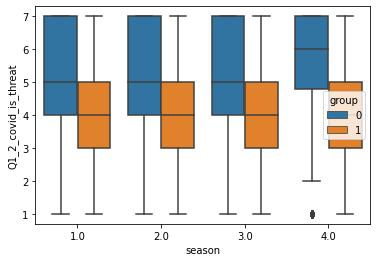

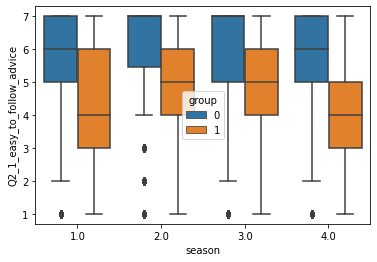

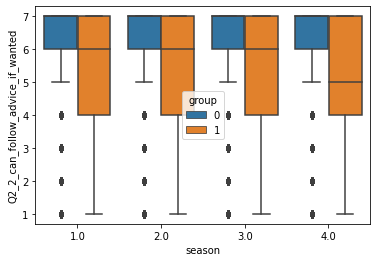

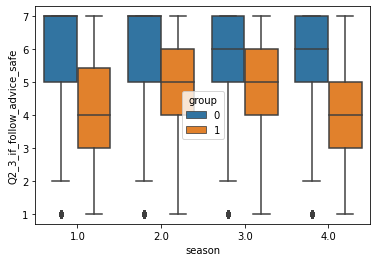

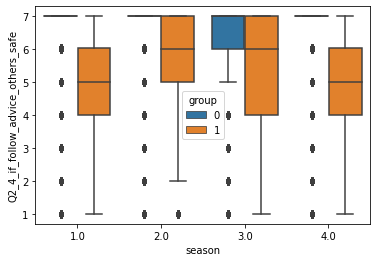

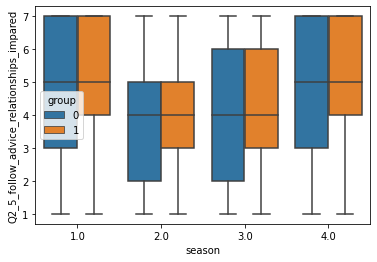

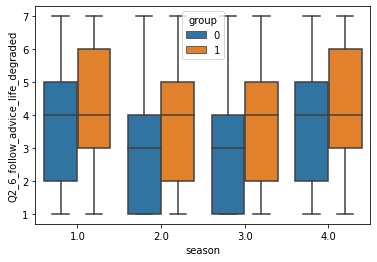

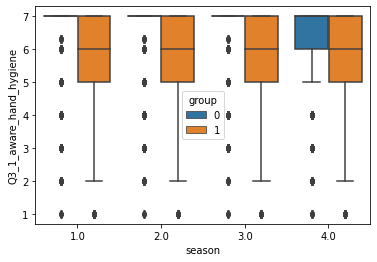

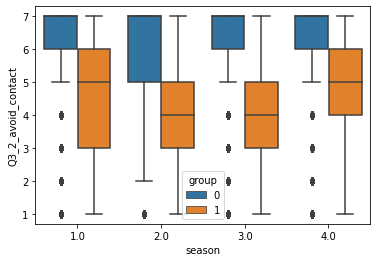

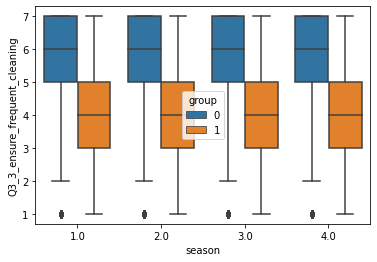

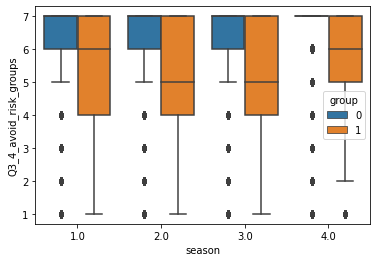

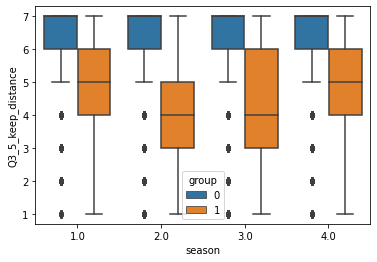

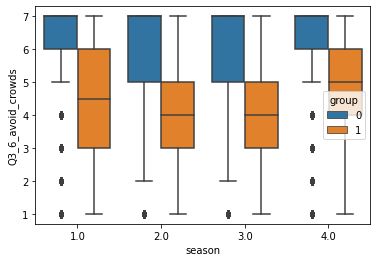

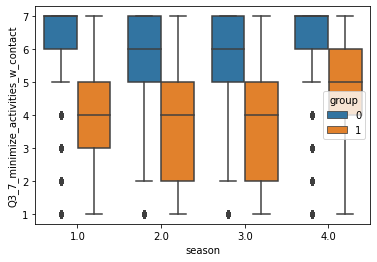

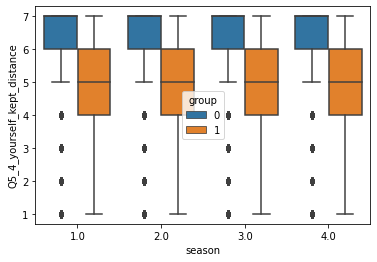

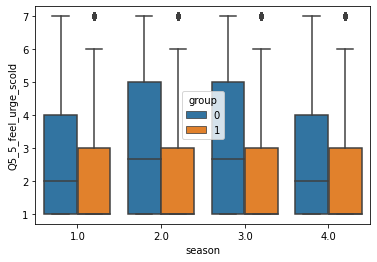

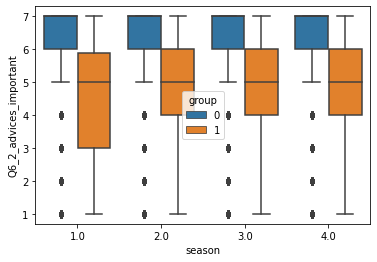

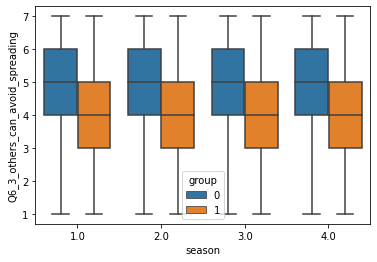

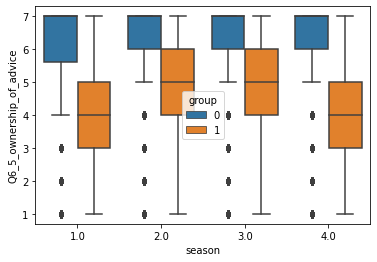

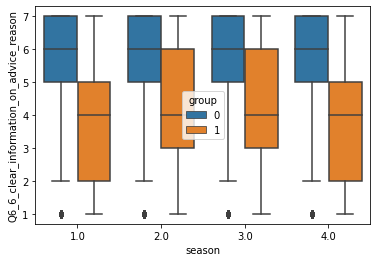

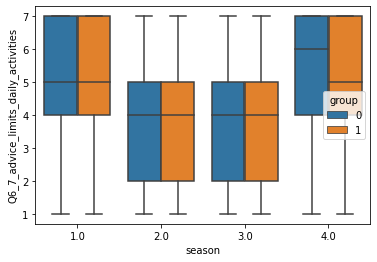

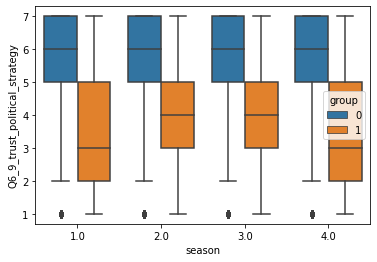

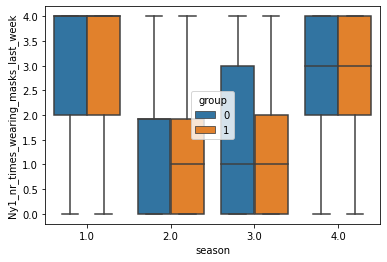

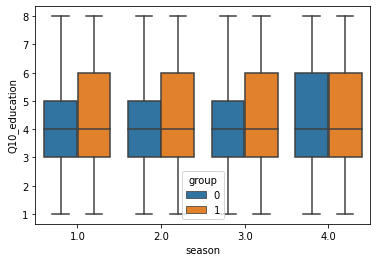

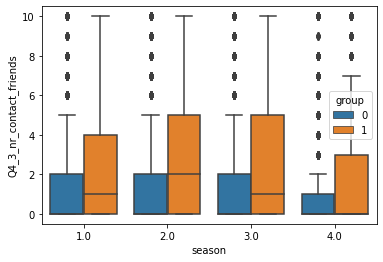

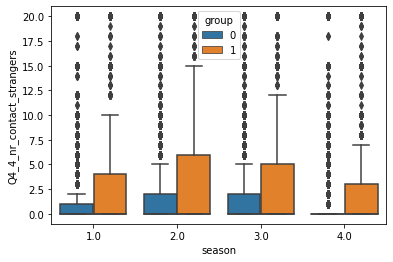

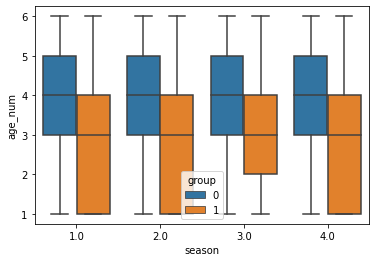

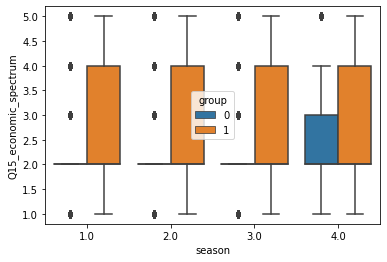

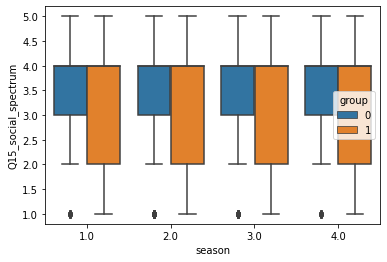

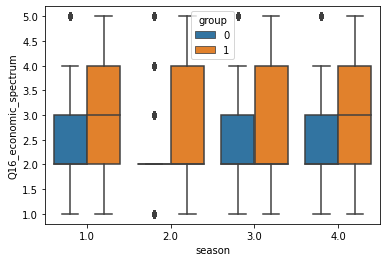

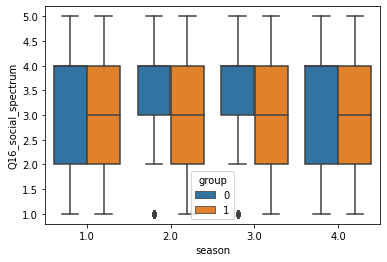

In [95]:
for i in interesting_cols:
  sns.boxplot(x="season", y=i, hue="group",data=df)
  plt.show()

## Change political opinion

### Economic

In [96]:
for i, eco in df.groupby('Q15_economic_spectrum'):
    print(f'From {eco.shape[0]} People that Voted {i} changed to:')
    px.histogram(eco, x='Q16_economic_spectrum', color='group', barmode='overlay', histnorm='percent').show()

From 7018 People that Voted 1.0 changed to:


From 61410 People that Voted 2.0 changed to:


From 5421 People that Voted 3.0 changed to:


From 18467 People that Voted 4.0 changed to:


From 2601 People that Voted 5.0 changed to:


### Social

In [97]:
for i, eco in df.groupby('Q15_social_spectrum'):
    print(f'From {eco.shape[0]} People that Voted {i} changed to:')
    px.histogram(eco, x='Q16_social_spectrum', color='group', barmode='overlay', histnorm='percent').show()

From 292 People that Voted 1.0 changed to:


From 23542 People that Voted 2.0 changed to:


From 14480 People that Voted 3.0 changed to:


From 54194 People that Voted 4.0 changed to:


From 2409 People that Voted 5.0 changed to:


## Daily average

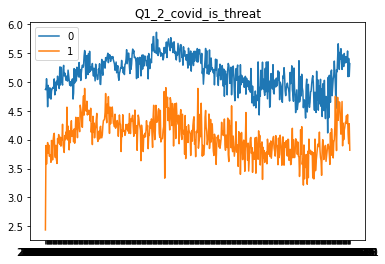

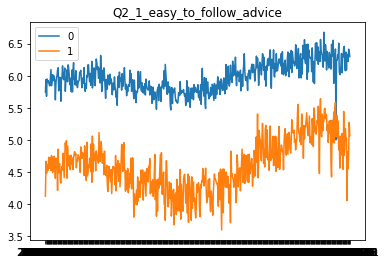

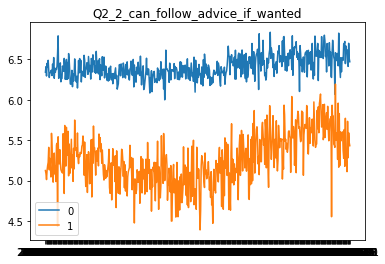

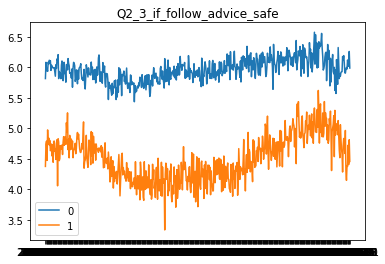

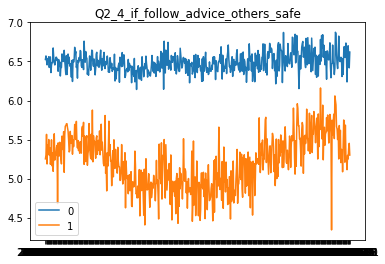

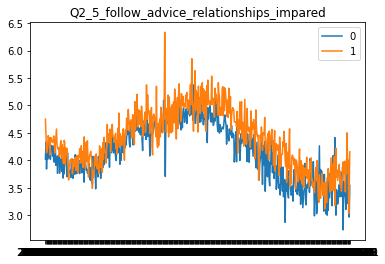

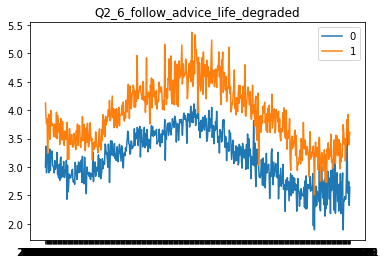

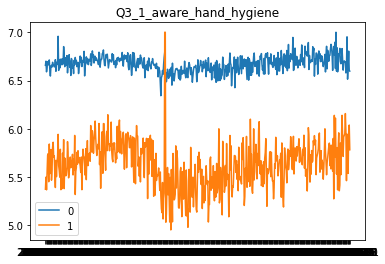

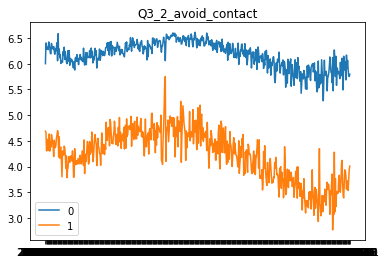

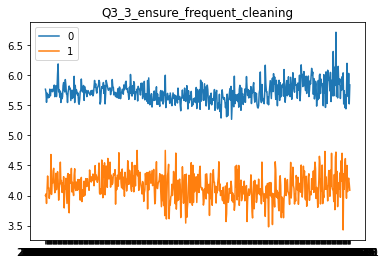

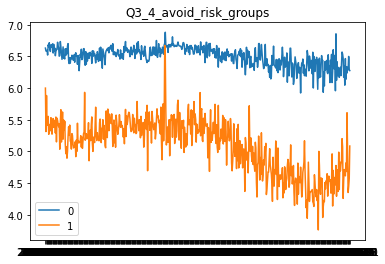

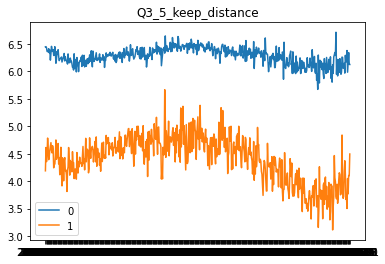

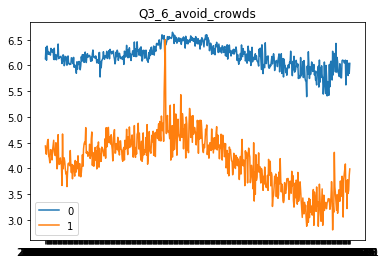

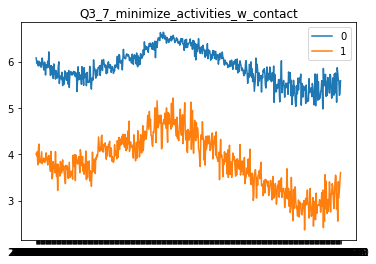

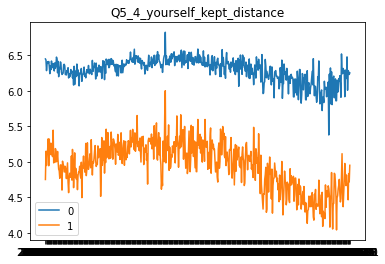

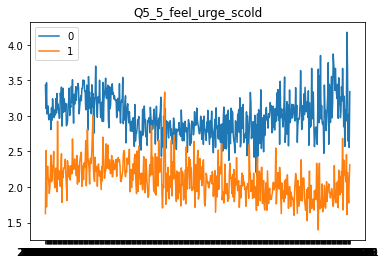

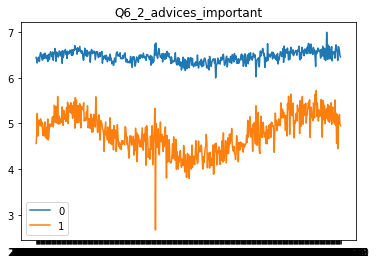

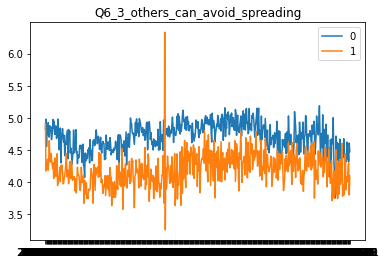

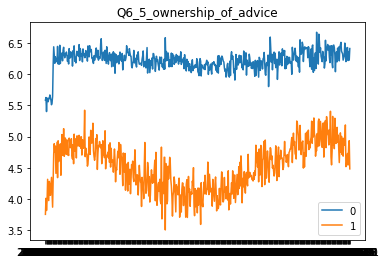

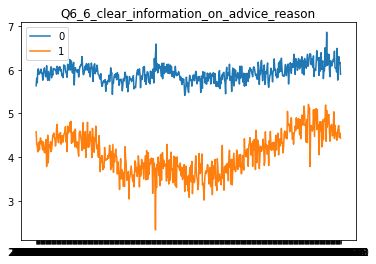

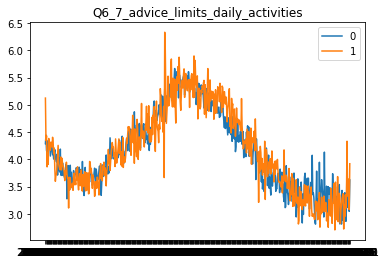

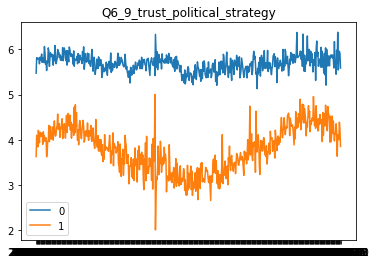

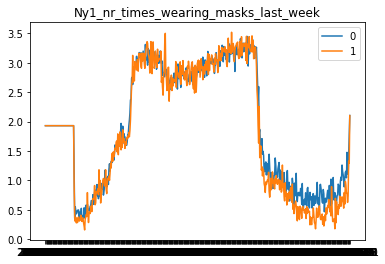

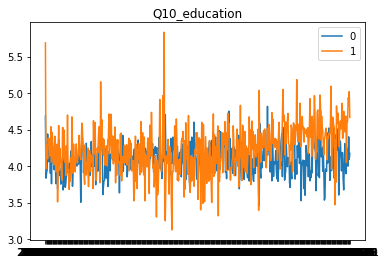

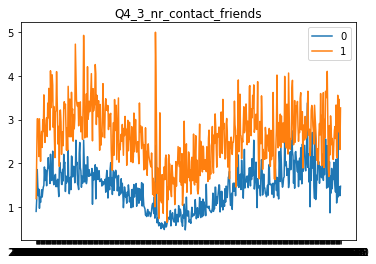

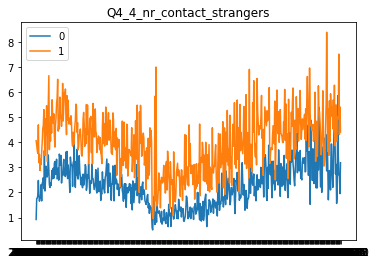

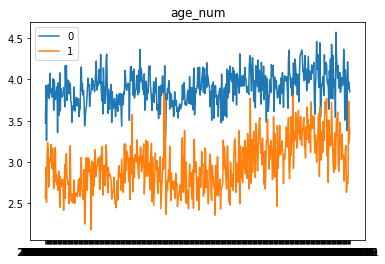

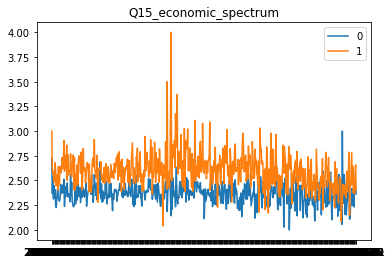

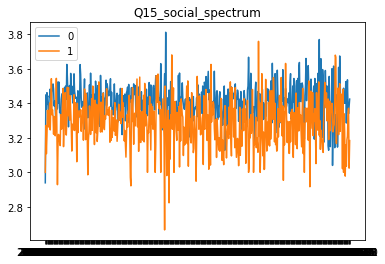

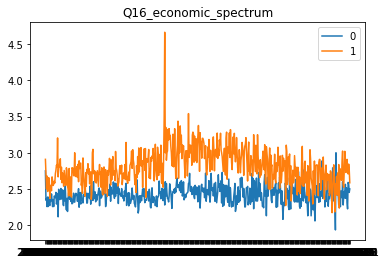

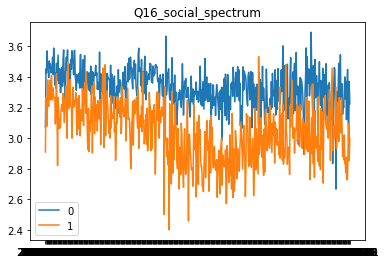

In [98]:
df_daily_average = df.groupby(['date','group']).mean().reset_index()
df_daily_average_0 = df_daily_average[df_daily_average.group == 0]
df_daily_average_1 = df_daily_average[df_daily_average.group == 1]
for col in interesting_cols:
    plt.plot(df_daily_average_0.date,df_daily_average_0[col], label='0')
    plt.plot(df_daily_average_1.date,df_daily_average_1[col], label='1')
    plt.legend()
    plt.title(col)
    plt.show()

## Ocupation distribution

In [99]:
df[['Q14_ocupation_pensioner', 'Q14_ocupation_employee_private',
       'Q14_ocupation_unemployed', 'Q14_ocupation_employee_public',
       'Q14_ocupation_self_employed', 'Q14_ocupation_student',
       'Q14_ocupation_other']].sum()/ df[['Q14_ocupation_pensioner', 'Q14_ocupation_employee_private',
                                          'Q14_ocupation_unemployed', 'Q14_ocupation_employee_public',
                                          'Q14_ocupation_self_employed', 'Q14_ocupation_student',
                                          'Q14_ocupation_other']].sum().sum()

Q14_ocupation_pensioner           0.319021
Q14_ocupation_employee_private    0.219484
Q14_ocupation_unemployed          0.031621
Q14_ocupation_employee_public     0.268153
Q14_ocupation_self_employed       0.054075
Q14_ocupation_student             0.072450
Q14_ocupation_other               0.035195
dtype: float64

## PCA visualization

### PCA

In [12]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array(answers)
pca = PCA(n_components=3)
answers_reduced = pca.fit_transform(X)

In [13]:
df_reduced = pd.DataFrame(answers_reduced,columns=['PC1','PC2', 'PC3'])
df_reduced['group'] = kmeans.labels_
df_reduced['date'] = df['date']

In [14]:
pca.components_[0]

array([-0.17959895, -0.19527186, -0.15881993, -0.21118127, -0.18446532,
        0.03359106,  0.11372793, -0.15006926, -0.28408945, -0.22625007,
       -0.20230925, -0.26861684, -0.29351124, -0.30431768, -0.20118344,
       -0.13472885, -0.23802986, -0.07965397, -0.24485124, -0.25947688,
       -0.01414332, -0.27699886, -0.06965021,  0.05596703,  0.10273206,
        0.1144458 ,  0.08927237])

### 2D

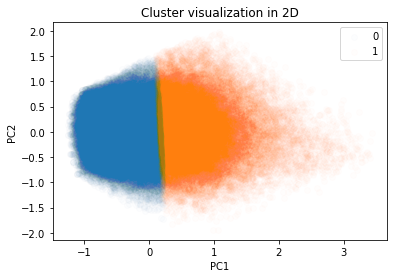

In [16]:
import matplotlib.pyplot as plt
group_0 = df_reduced[df_reduced.group == 0]
group_1 = df_reduced[df_reduced.group == 1]

plt.scatter(group_0['PC1'],group_0['PC2'],alpha=0.01,label='0')
plt.scatter(group_1['PC1'],group_1['PC2'],alpha=0.01,label='1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster visualization in 2D')
plt.legend()
plt.show()

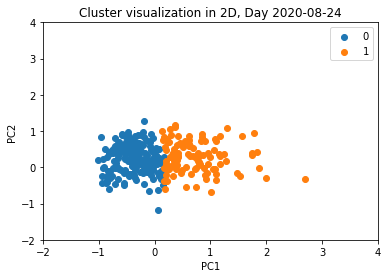

KeyboardInterrupt: 

In [19]:
import time
from IPython.display import clear_output
group_0 = df_reduced[df_reduced.group == 0]
group_1 = df_reduced[df_reduced.group == 1]
for i in df_reduced.date.sort_values().unique():
    plt.scatter(group_0[group_0.date == i]['PC1'],group_0[group_0.date == i]['PC2'],alpha=1,label='0')
    plt.scatter(group_1[group_1.date == i]['PC1'],group_1[group_1.date == i]['PC2'],alpha=1,label='1')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim(-2,4)
    plt.ylim(-2,4)
    plt.title(f'Cluster visualization in 2D, Day {i}')
    plt.legend()
    plt.show()

    time.sleep(0.2)
    clear_output()


# 3D


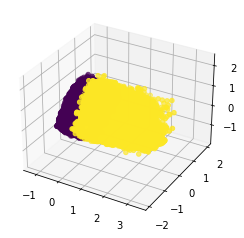

In [145]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_reduced['PC1'], df_reduced['PC2'], df_reduced['PC3'], c=df_reduced['group'])